In [1]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
matFilename = './2018-04-12_batchdata_updated_struct_errorcorrect.mat'
f = h5py.File(matFilename)

/Users/omer/opt/miniconda3/envs/noise/lib/python3.7/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


In [3]:
list(f.keys())

['#refs#', '#subsystem#', 'batch', 'batch_date']

In [4]:
batch = f['batch']

In [5]:
list(batch.keys())

['Vdlin',
 'barcode',
 'channel_id',
 'cycle_life',
 'cycles',
 'policy',
 'policy_readable',
 'summary']

In [6]:
num_cells = batch['summary'].shape[0]
bat_dict = {}
for i in range(num_cells):
    cl = f[batch['cycle_life'][i,0]].value
    policy = f[batch['policy_readable'][i,0]].value.tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]].value))
        Qc = np.hstack((f[cycles['Qc'][j,0]].value))
        Qd = np.hstack((f[cycles['Qd'][j,0]].value))
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]].value))
        T = np.hstack((f[cycles['T'][j,0]].value))
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]].value))
        V = np.hstack((f[cycles['V'][j,0]].value))
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]].value))
        t = np.hstack((f[cycles['t'][j,0]].value))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b3c' + str(i)
    bat_dict[key]=   cell_dict

/Users/omer/opt/miniconda3/envs/noise/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.
/Users/omer/opt/miniconda3/envs/noise/lib/python3.7/site-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """
/Users/omer/opt/miniconda3/envs/noise/lib/python3.7/site-packages/ipykernel_launcher.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/Users/omer/opt/miniconda3/envs/noise/lib/python3.7/site-packages/ipykernel_launcher.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/Users/omer/opt/miniconda3/envs/noise/lib/python3.7/site-packages/ipykernel_launcher.py:22: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/Users/omer/opt/miniconda3/envs/noise/lib/python3.7/site-packages/ipykernel_

In [7]:
bat_dict.keys()

dict_keys(['b3c0', 'b3c1', 'b3c2', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c23', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30', 'b3c31', 'b3c32', 'b3c33', 'b3c34', 'b3c35', 'b3c36', 'b3c37', 'b3c38', 'b3c39', 'b3c40', 'b3c41', 'b3c42', 'b3c43', 'b3c44', 'b3c45'])

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


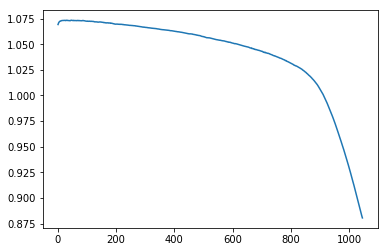

In [8]:
plt.plot(bat_dict['b3c43']['summary']['cycle'], bat_dict['b3c43']['summary']['QD'])

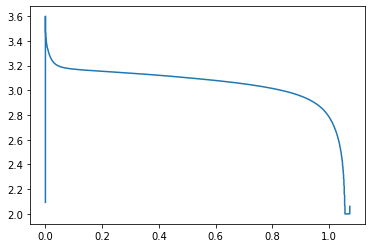

In [8]:
plt.plot(bat_dict['b3c43']['cycles']['10']['Qd'], bat_dict['b3c43']['cycles']['10']['V'])

In [9]:
with open('batch3.pkl','wb') as fp:
        pickle.dump(bat_dict,fp)